# Greedy Active Acquisition Plots

This notebook is for making plots similar to the ones from the active feature acqisition experiments in the paper.

In [1]:
import os
import pickle

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In the cell below, set `RUN_DIR` to a run directory that contains trajectories generated by the `eval_greedy_acquisition.py` script.

In [2]:
RUN_DIR = "../runs/lookahead-mnist16-20220303-081804"

with open(os.path.join(RUN_DIR, "trajectories", "sampling_trajectories.pkl"), "rb") as fp:
    sampling_trajectories = pickle.load(fp)
    
with open(os.path.join(RUN_DIR, "trajectories", "lookahead_trajectories.pkl"), "rb") as fp:
    lookahead_trajectories = pickle.load(fp)

## Plot RMSE

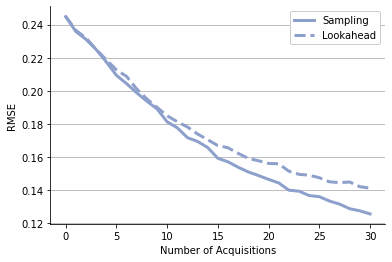

In [3]:
x = np.arange(31)
mean_rmse_sampling = np.mean(
    np.array(list(map(lambda x: x["rmse"], sampling_trajectories))), 0
)
mean_rmse_lookahead = np.mean(
    np.array(list(map(lambda x: x["rmse"], lookahead_trajectories))), 0
)

sns.lineplot(x=x, y=mean_rmse_sampling, label="Sampling", linewidth=3, color="#8da0cb")
sns.lineplot(x=x, y=mean_rmse_lookahead, label="Lookahead", linewidth=3, color="#8da0cb", linestyle="--")
sns.despine()

leg = plt.legend(frameon=True, framealpha=1.0)
plt.xlabel("Number of Acquisitions")
plt.ylabel("RMSE")
plt.grid(visible=True, axis="y")

plt.show()

## Plot Imputations

Note that the cell below is assuming the provided trajectories are for image data.

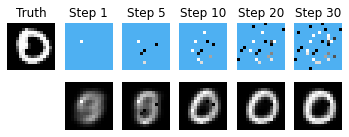

In [4]:
fig, axes = plt.subplots(2, 6, figsize=(6, 2), squeeze=True)

traj = lookahead_trajectories[1]
times = np.array([1, 5, 10, 20, 30])

for i, t in enumerate(times):
    x = traj["truth"]
    b = traj["mask"][t]
    xo = np.where(b, x, [[[78 / 255.0, 176 / 255.0, 242 / 255.0]]])
    axes[0][i + 1].matshow(xo, cmap="gray", vmin=0, vmax=1)
    axes[1][i + 1].matshow(traj["reconstruction"][t], cmap="gray", vmin=0, vmax=1)
    axes[0][i + 1].set_title(f"Step {t}")
    
axes[0][0].matshow(x, cmap="gray", vmin=0, vmax=1)
axes[0][0].set_title("Truth")

axes[1][0].set_visible(False)

for ax in axes.flat:
    ax.set_xticks([])
    ax.set_yticks([])
    ax.axis("off")

plt.show()